# MSDS696 Practicum 2 
## Fall 8W2 2020

### Exploration of Colorado County-Level Voting Patterns 2010 - 2020

#### James D. Reed (jreed011@regis.edu)

<img src="../img/Mountains2.jpg" width="700" height="200" />

## Census Data Exploratory Data Analysis


In [1]:
import requests
import pandas as pd
#import censusdata
from pathlib import Path
import censusFunctions as cf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from decouple import config
import os
%matplotlib inline

In [2]:
global CENSUS_KEY
global GOOGLE_KEY

def get_census_keys():
    # Get CENSUS_KEY
    try:
        BASE_DIR = os.path.dirname(os.path.abspath(__file__))
    except NameError:  # We are the main py2exe script, not a module
        import sys
        BASE_DIR = os.path.dirname(os.path.abspath(sys.argv[0]))

    CENSUS = config('CENSUS_KEY')
    GOOGLE = config('GOOGLE_KEY')
    #print(f'CENSUS: {CENSUS}, GOOGLE: {GOOGLE}')
    return(CENSUS, GOOGLE)

In [3]:
CENSUS_KEY, GOOGLE_KEY = get_census_keys()
#print(f'CENSUS: {CENSUS_KEY}, GOOGLE: {GOOGLE_KEY}')

---
## Decennial 2010 Census of Population

 - Demographics (age, sex, race, family structure))
 - Housing Occupancy and Ownership (vacant./occupied, rent/own)
 - Group Quarters Population (prisons, college dorms)

### Load Population DataFrame

In [4]:
population_df = cf.load_pickled_df(path = 
    "/home/jdreed/MSDS696/data/processed/Census2010-population_df.p")

In [5]:
population_df.head()

,county,total_pop,total_urb_rur,urban,urban_ins_ars,urban_ins_cls,rural,total_race,white,black,american_indian,asian,nat_hawaiian,some_othr_race,two_or_more_races,hisp_latino,not_hisp_latino,total_hisp_latino,state_id,county_id
0,Costilla,3524,3524,0,0,0,3524,3524,2397,24,104,34,9,803,153,3524,1197,2327,8,23
1,Crowley,5823,5823,0,0,0,5823,5823,4509,559,139,59,0,456,101,5823,4137,1686,8,25
2,Custer,4255,4255,0,0,0,4255,4255,4055,44,30,16,0,39,71,4255,4055,200,8,27
3,Delta,30952,30952,11399,0,11399,19553,30952,27761,160,295,160,15,1862,699,30952,26607,4345,8,29
4,Denver,600158,600158,600158,600158,0,0,600158,413696,61435,8237,20433,607,71191,24559,600158,409193,190965,8,31


In [6]:
population_df.describe()

,total_pop,total_urb_rur,urban,urban_ins_ars,urban_ins_cls,rural,total_race,white,black,american_indian,asian,nat_hawaiian,some_othr_race,two_or_more_races,hisp_latino,not_hisp_latino,total_hisp_latino,state_id,county_id
count,64.00000,64.00000,64.000000,64.000000,64.00000,64.000000,64.00000,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000,64.0,64.000000
mean,78581.18750,78581.18750,67699.390625,60397.984375,7301.40625,10881.796875,78581.18750,63893.781250,3152.140625,875.156250,2172.31250,103.484375,5689.687500,2694.625000,78581.18750,62351.703125,16229.484375,8.0,62.234375
std,157027.62997,157027.62997,150562.413364,150552.140964,11475.32523,11537.590360,157027.62997,123363.297992,11450.748038,1695.723325,5666.67142,322.226185,13645.174846,6373.716076,157027.62997,124806.848755,37267.804962,0.0,36.880649
min,699.00000,699.00000,0.000000,0.000000,0.00000,0.000000,699.00000,647.000000,0.000000,2.000000,0.00000,0.000000,2.000000,10.000000,699.00000,615.000000,21.000000,8.0,1.000000
25%,5734.00000,5734.00000,0.000000,0.000000,0.00000,3967.250000,5734.00000,4985.000000,27.750000,55.500000,25.75000,2.750000,223.000000,107.000000,5734.00000,4317.250000,678.500000,8.0,30.500000
50%,15083.50000,15083.50000,5691.000000,0.000000,2763.00000,6642.000000,15083.50000,12694.500000,96.000000,154.000000,101.50000,9.000000,782.000000,329.500000,15083.50000,10585.500000,2237.500000,8.0,62.000000
75%,42663.00000,42663.00000,22574.000000,0.000000,9818.50000,13848.500000,42663.00000,37409.250000,511.750000,436.250000,279.00000,25.000000,2509.250000,910.750000,42663.00000,33988.750000,7231.500000,8.0,93.500000
max,622263.00000,622263.00000,600158.000000,600158.000000,55404.00000,55595.000000,622263.00000,496258.000000,61435.000000,8237.000000,29077.00000,2185.000000,71191.000000,31787.000000,622263.00000,528598.000000,190965.000000,8.0,125.000000


[Text(0, 0, 'Mesa'),
 Text(1, 0, 'Pueblo'),
 Text(2, 0, 'Weld'),
 Text(3, 0, 'Douglas'),
 Text(4, 0, 'Boulder'),
 Text(5, 0, 'Larimer'),
 Text(6, 0, 'Adams'),
 Text(7, 0, 'Jefferson'),
 Text(8, 0, 'Arapahoe'),
 Text(9, 0, 'Denver'),
 Text(10, 0, 'El Paso')]

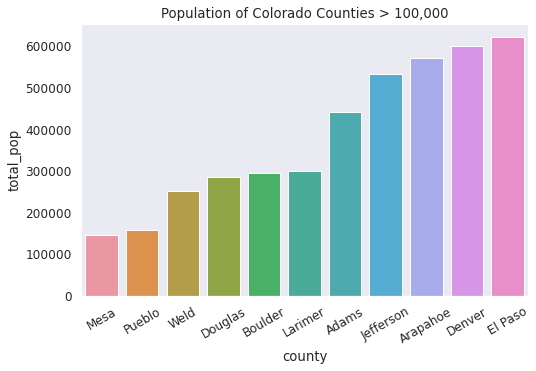

In [7]:
sns.set_context(context = 'notebook', font_scale = 1.1)
sns.set_style('dark')
plt.figure(figsize=(8,5))
population_sorted = population_df.sort_values('total_pop')
population_sorted = population_sorted[population_sorted['total_pop'] > 100000 ]
plt.title("Population of Colorado Counties > 100,000")
g = sns.barplot(y = 'total_pop', x = 'county', data = population_sorted)
g.set_xticklabels(labels = population_sorted['county'], rotation=30)

<AxesSubplot:>

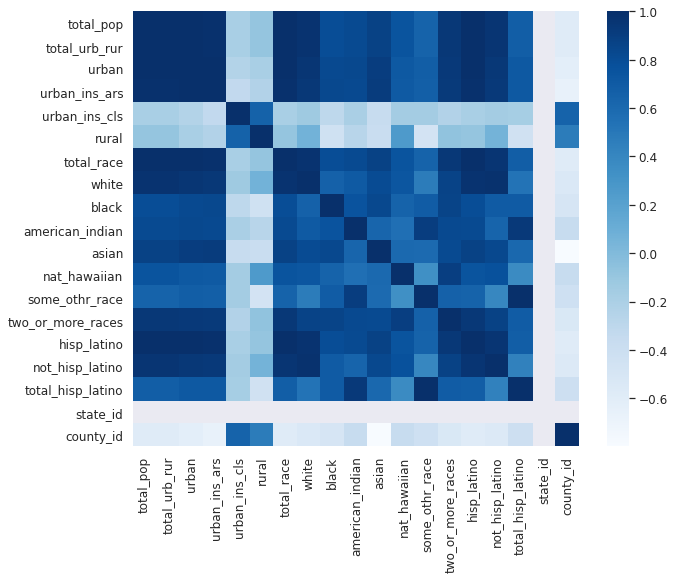

In [8]:
plt.figure(figsize=(10,8))
pop_matrix = population_sorted.corr()
sns.heatmap(pop_matrix, cmap = 'Blues')

---
## Decennial Census - Gender

 - Housing Occupancy and Ownership (vacant./occupied, rent/own)
 - Group Quarters Population (prisons, college dorms)

### Load Gender DataFrame

In [9]:
gender_df = cf.load_pickled_df(path = 
    "/home/jdreed/MSDS696/data/processed/Census2010-gender_df.p")

In [10]:
gender_df.head()

,county,total_sex_byage,total_male,male_u5,male_5_9,male_10_14,male_15_17,male_18_19,male_20,male_21,...,female_60_61,female_62_64,female_65_66,female_67_69,female_70_74,female_75_79,female_80_84,female_85_over,state_id,county_id
0,Costilla,3524,1822,99,102,107,95,41,15,19,...,54,84,62,72,102,66,51,51,8,23
1,Crowley,5823,4199,88,110,136,81,46,59,65,...,37,76,37,62,52,61,54,51,8,25
2,Custer,4255,2195,62,95,113,85,27,16,10,...,112,131,85,87,110,89,50,25,8,27
3,Delta,30952,15590,887,913,1042,680,356,139,139,...,490,717,401,562,786,614,429,511,8,29
4,Denver,600158,300089,22252,18894,15319,8920,7191,3981,4039,...,6309,8292,4325,5707,7569,6274,5905,6513,8,31


In [11]:
gender_df.describe()

,total_sex_byage,total_male,male_u5,male_5_9,male_10_14,male_15_17,male_18_19,male_20,male_21,male_22_24,...,female_60_61,female_62_64,female_65_66,female_67_69,female_70_74,female_75_79,female_80_84,female_85_over,state_id,county_id
count,64.00000,64.000000,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.0,64.000000
mean,78581.18750,39385.343750,2755.640625,2777.843750,2659.250000,1611.56250,1134.218750,566.312500,550.906250,1722.859375,...,920.140625,1218.781250,644.562500,836.031250,1057.734375,835.187500,677.671875,726.484375,8.0,62.234375
std,157027.62997,77999.350262,5731.162580,5661.154448,5395.236132,3248.15466,2298.264297,1190.993435,1167.530642,3633.456673,...,1780.523624,2352.923183,1229.267311,1594.255899,2051.201632,1642.779525,1356.967453,1463.934880,0.0,36.880649
min,699.00000,362.000000,8.000000,22.000000,14.000000,8.00000,2.000000,2.000000,1.000000,9.000000,...,12.000000,20.000000,5.000000,12.000000,6.000000,5.000000,2.000000,3.000000,8.0,1.000000
25%,5734.00000,3152.500000,144.750000,148.750000,154.500000,100.50000,48.750000,24.750000,25.750000,90.000000,...,78.000000,103.000000,60.000000,71.750000,101.000000,75.000000,52.500000,50.500000,8.0,30.500000
50%,15083.50000,7837.000000,417.000000,426.500000,418.000000,292.00000,173.500000,81.000000,79.000000,254.000000,...,198.500000,255.500000,137.500000,182.000000,205.000000,145.000000,110.500000,115.000000,8.0,62.000000
75%,42663.00000,21767.000000,1144.000000,1213.500000,1268.000000,851.75000,477.250000,269.250000,271.000000,996.000000,...,527.250000,723.250000,361.250000,454.250000,590.000000,446.250000,377.250000,428.750000,8.0,93.500000
max,622263.00000,310162.000000,23152.000000,23050.000000,23252.000000,14097.00000,10417.000000,5512.000000,5363.000000,15708.000000,...,7215.000000,9738.000000,5027.000000,6641.000000,8375.000000,6725.000000,5905.000000,6513.000000,8.0,125.000000


## Gender Choropleth

vmin: 1 vmax: 5363


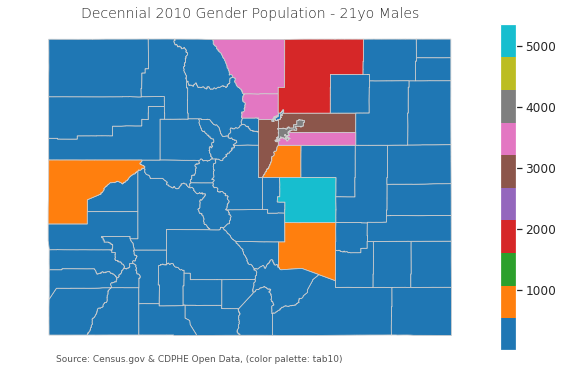

In [12]:
cf.gen_colo_choropleth(gender_df, 'decennial_2010_gender', 'male_21', 'Decennial 2010 Gender Population - 21yo Males', 'tab10')

vmin: 1 vmax: 4349
vmin: 1 vmax: 4349
vmin: 1 vmax: 4349
vmin: 1 vmax: 4349
vmin: 1 vmax: 4349
vmin: 1 vmax: 4349
vmin: 1 vmax: 4349
vmin: 1 vmax: 4349
vmin: 1 vmax: 4349


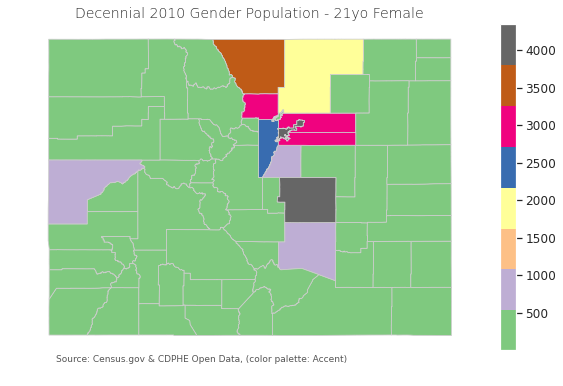

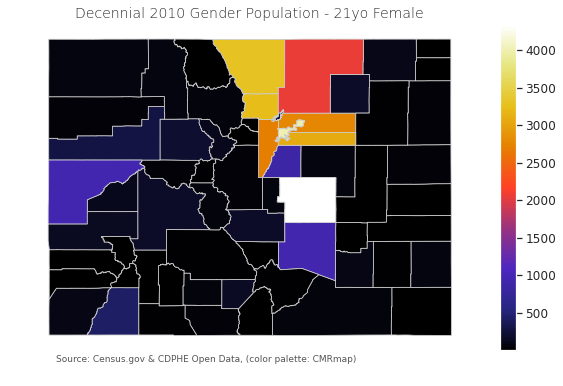

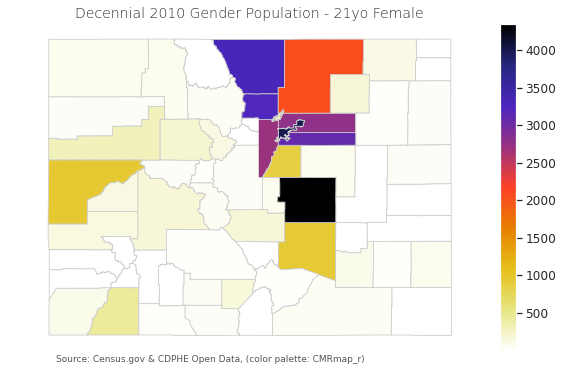

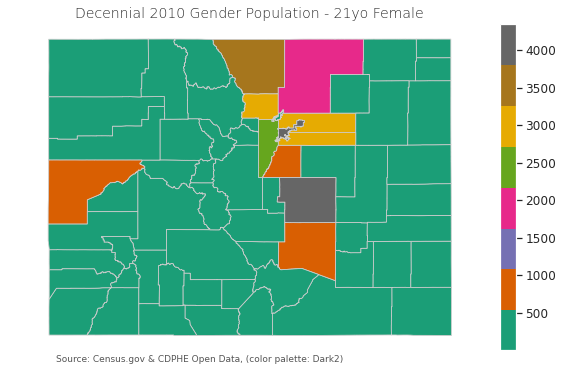

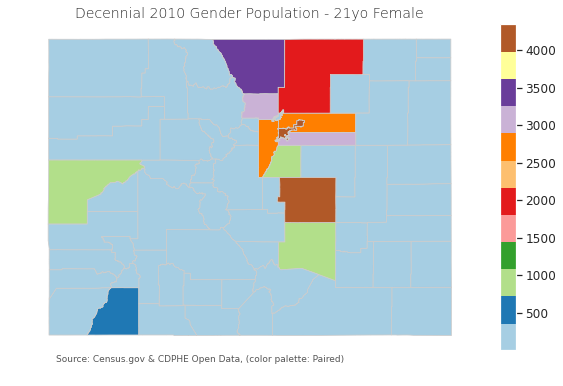

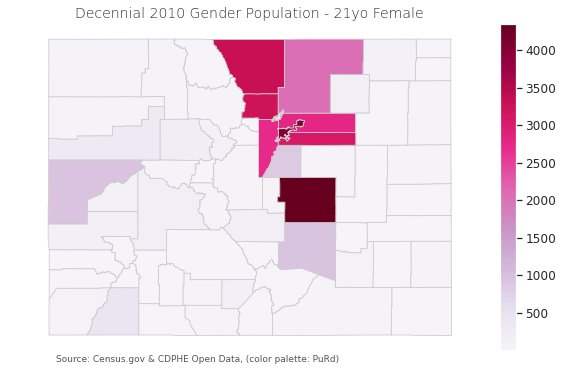

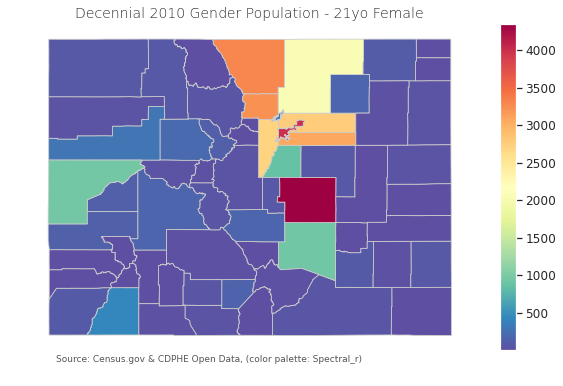

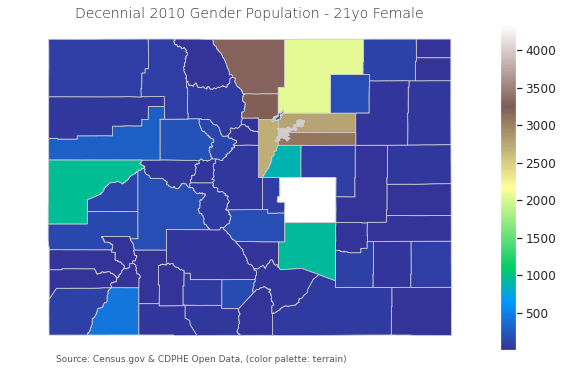

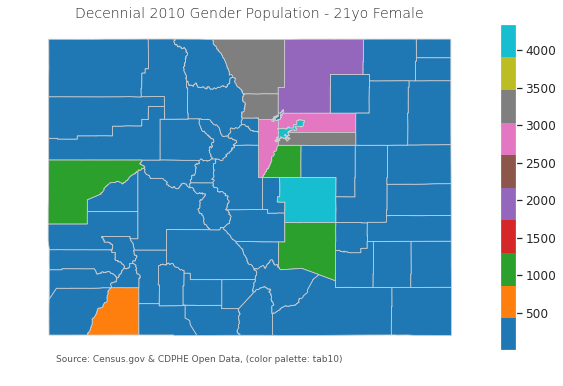

In [13]:
pals = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 
        'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
        'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
        'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 
        'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 
        'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 
        'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 
        'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 
        'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 
        'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 
        'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 
        'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 
        'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 
        'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 
        'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 
        'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

pals = ['Accent',  'CMRmap', 'CMRmap_r', 'Dark2', 'Paired', 'PuRd', 'Spectral_r', 'terrain', 'tab10']

for p in pals:
    cf.gen_colo_choropleth(gender_df, 'decennial_2010_gender', 'female_21', 
                           'Decennial 2010 Gender Population - 21yo Female',p)


---
## Decennial Census 2010

Housing survey
 - Housing Occupancy and Ownership (vacant/occupied, rent/own)
 - Group Quarters Population (prisons, college dorms)

### Load Housing DataFrame

In [14]:
 housing_df = cf.load_pickled_df(path = 
    "/home/jdreed/MSDS696/data/processed/Census2010-housing_df.p")

In [15]:
housing_df.head()

,county,total_house_tenure,total_occupied,households_fam,households_husband_wife,households_other,households_other_male,households_other_owner,households_nonfam,householder_living_alone,...,renter_25_34,renter_35_44,renter_45_54,renter_55_59,renter_60_64,renter_65_74,renter_75_84,renter_85_up,state_id,county_id
0,Costilla,1550,976,691,285,105,180,574,520,54,...,65,47,65,31,30,56,26,9,8,23
1,Crowley,1306,856,646,210,71,139,450,394,56,...,65,71,68,44,32,36,16,13,8,25
2,Custer,1925,1272,1135,137,61,76,653,580,73,...,54,64,78,39,41,36,22,16,8,27
3,Delta,12703,8652,7137,1515,510,1005,4051,3486,565,...,602,565,605,256,228,288,179,116,8,29
4,Denver,263107,125004,85747,39257,11435,27822,138103,106828,31275,...,44471,23896,18148,7647,6092,6962,4480,2908,8,31


In [16]:
housing_df.describe()

,total_house_tenure,total_occupied,households_fam,households_husband_wife,households_other,households_other_male,households_other_owner,households_nonfam,householder_living_alone,householder_not_living_alone,...,renter_25_34,renter_35_44,renter_45_54,renter_55_59,renter_60_64,renter_65_74,renter_75_84,renter_85_up,state_id,county_id
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.00000,64.000000,64.00000,64.000000,64.000000,64.000000,64.0,64.000000
mean,30826.062500,19711.359375,15178.078125,4533.281250,1426.546875,3106.734375,11114.703125,8606.156250,2508.546875,30826.062500,...,3026.140625,2050.093750,1729.00000,647.890625,488.31250,542.625000,377.750000,271.875000,8.0,62.234375
std,62189.745293,38956.548991,29509.677221,9690.349977,2931.714656,6768.228807,24461.697644,19023.578647,5545.149769,62189.745293,...,7429.250728,4627.203083,3732.24226,1409.021839,1074.31422,1195.469523,813.072499,588.596569,0.0,36.880649
min,344.000000,156.000000,123.000000,24.000000,10.000000,11.000000,123.000000,101.000000,13.000000,344.000000,...,8.000000,14.000000,13.00000,7.000000,5.00000,3.000000,1.000000,0.000000,8.0,1.000000
25%,2011.500000,1343.250000,1172.500000,268.500000,91.250000,171.000000,725.250000,645.750000,85.500000,2011.500000,...,124.250000,116.500000,118.75000,50.750000,40.25000,42.750000,27.000000,15.000000,8.0,30.500000
50%,6189.500000,3756.000000,2908.500000,741.500000,257.500000,459.000000,1979.500000,1632.000000,347.500000,6189.500000,...,353.000000,313.000000,310.00000,135.000000,95.00000,99.500000,56.000000,32.000000,8.0,62.000000
75%,16508.500000,11074.000000,8755.750000,2088.750000,727.500000,1301.000000,5310.000000,4259.250000,1340.750000,16508.500000,...,1114.000000,854.250000,772.50000,305.000000,233.50000,288.750000,210.500000,148.000000,8.0,93.500000
max,263107.000000,160489.000000,123304.000000,39257.000000,11435.000000,27822.000000,138103.000000,106828.000000,31275.000000,263107.000000,...,44471.000000,23896.000000,18148.00000,7647.000000,6092.00000,6962.000000,4480.000000,2908.000000,8.0,125.000000


## American Community Survey
 - Educational Attainment
 - Commuting (mode, time leaving, time travelled)
 - Disability Status
 
 #### Load ACS 2019 Population Data for Colorado Counties

In [17]:
acs19_pop_df = cf.load_pickled_df(path = 
    "/home/jdreed/MSDS696/data/processed/ACS19-acs19_pop_df.p")

In [18]:
acs19_pop_df.head()

,county,pop_by_sex,pbs_male,pbs_female,pop_und18,pop_und18_by_age,pop_lt3,pop_3_5,pop_6_8,pop_9_11,...,total_pop_by_age,pop_all_und18,pop_all_18_24,pop_all_25_34,pop_all_35_44,pop_all_45_54,pop_all_55_64,pop_all_65_over,state_id,county_id
0,Chaffee,20356,11304,9052,0,0,0,0,0,0,...,20356,2100,786,2262,1851,2915,3800,6642,8,15
1,Garfield,60061,30081,29980,14435,14435,2722,2408,2920,2700,...,60061,14435,4956,8498,9220,6820,7180,8952,8,45
2,Jefferson,582881,291077,291804,113197,112660,17193,17334,18244,20936,...,582881,113197,43778,88288,82233,73863,82433,99089,8,59
3,Adams,517421,263655,253766,135127,135092,21231,22013,23066,25057,...,517421,135127,45363,85655,76461,62854,56337,55624,8,1
4,Eagle,55127,30609,24518,11619,11619,1906,1223,1469,2653,...,55127,11619,4224,8061,9377,8234,6359,7253,8,37


In [19]:
acs19_pop_df.describe()

,pop_by_sex,pbs_male,pbs_female,pop_und18,pop_und18_by_age,pop_lt3,pop_3_5,pop_6_8,pop_9_11,pop_12_14,...,total_pop_by_age,pop_all_und18,pop_all_18_24,pop_all_25_34,pop_all_35_44,pop_all_45_54,pop_all_55_64,pop_all_65_over,state_id,county_id
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.00000,27.000000,27.000000,27.000000,27.0,27.000000
mean,202878.740741,102171.592593,100707.148148,44359.703704,44260.222222,6679.370370,7353.407407,7113.888889,7720.814815,7742.185185,...,202878.740741,44535.740741,18663.962963,32273.407407,28490.37037,24814.851852,24859.666667,29240.740741,8.0,59.481481
std,241418.908512,120939.763246,120503.425702,54348.648811,54213.912002,8381.356679,9458.239893,8736.908929,9484.759115,9311.446273,...,241418.908512,54202.999732,22887.865545,44459.745734,35012.99809,29394.073803,27874.520477,31819.590135,0.0,36.731217
min,20356.000000,10402.000000,9052.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20356.000000,2100.000000,786.000000,2135.000000,1851.00000,1993.000000,2805.000000,3807.000000,8.0,1.000000
25%,27898.500000,14273.500000,13285.500000,5876.500000,5871.500000,738.500000,940.500000,1071.500000,762.500000,1204.000000,...,27898.500000,5876.500000,2137.000000,3259.500000,3517.50000,3382.000000,4621.000000,6002.000000,8.0,33.000000
50%,56221.000000,30081.000000,28419.000000,11619.000000,11619.000000,1906.000000,1725.000000,1841.000000,2653.000000,1915.000000,...,56221.000000,11619.000000,4956.000000,8061.000000,9220.00000,6838.000000,7609.000000,10232.000000,8.0,59.000000
75%,338675.000000,169891.000000,169049.000000,76664.500000,76550.000000,10515.500000,11958.500000,11596.000000,13662.500000,13388.000000,...,338675.000000,76664.500000,36679.000000,47931.500000,44582.00000,40192.000000,42860.500000,45868.500000,8.0,86.000000
max,727211.000000,364631.000000,362580.000000,171269.000000,171073.000000,25248.000000,31947.000000,28463.000000,29190.000000,27868.000000,...,727211.000000,171269.000000,77821.000000,172142.000000,117716.00000,83980.000000,84558.000000,99089.000000,8.0,123.000000


## American Community Survey
 - Marital Status: 
     + Never married
     + Now married
     + Separated
     + Widowed
     + Divorced
     
#### Load Marital Status Data Frame

In [20]:
acs19_mar_df = cf.load_pickled_df(path = 
    "/home/jdreed/MSDS696/data/processed/ACS19-acs19_mar_df.p")

In [21]:
acs19_mar_df.head()

,county,total_marital,never_married,now_married,separated,widowed,divorced,state_id,county_id
0,Chaffee,18661,3303,11236,47,1513,2562,8,15
1,Garfield,47774,13264,27474,500,1713,4823,8,45
2,Jefferson,490331,147548,256343,5533,21255,59652,8,59
3,Adams,405343,132990,201572,8200,14712,47869,8,1
4,Eagle,45961,17827,22549,202,484,4899,8,37


In [22]:
acs19_mar_df.describe()

,total_marital,never_married,now_married,separated,widowed,divorced,state_id,county_id
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.0,27.000000
mean,166093.888889,53645.037037,84189.444444,2032.888889,6808.740741,19417.777778,8.0,59.481481
std,196969.366416,70056.734988,95888.613426,2723.136460,8014.699647,23145.732405,0.0,36.731217
min,17252.000000,3303.000000,9836.000000,43.000000,220.000000,1931.000000,8.0,1.000000
25%,23051.000000,5549.000000,14000.000000,197.500000,1201.500000,3009.000000,8.0,33.000000
50%,47675.000000,13830.000000,24411.000000,565.000000,1934.000000,6445.000000,8.0,59.000000
75%,278456.500000,89012.000000,145282.500000,2489.000000,10920.000000,28249.500000,8.0,86.000000
max,608905.000000,260501.000000,305249.000000,8200.000000,25003.000000,75522.000000,8.0,123.000000


vmin: 9836 vmax: 305249


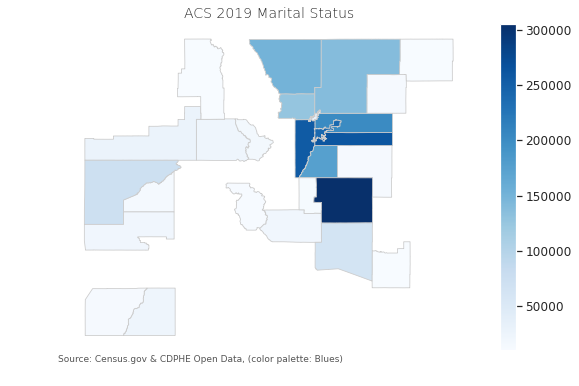

In [23]:
cf.gen_colo_choropleth(acs19_mar_df, 'ACS 2019 Marital Status', 'now_married', 'ACS 2019 Marital Status', 'Blues')

## 2019 1-Year Supplemental Estimates

### Poverty and Disability Estimates

#### Load Poverty and Disability Estimates Data FRame

In [24]:
acs19_pov_df = cf.load_pickled_df(path = 
    "/home/jdreed/MSDS696/data/processed/ACS19-acs19_pov_df.p")

In [25]:
acs19_pov_df.head()

,county,total_pov_hsh_type,total_below_pov,pov_below_married_cpl,pov_below_other,pov_below_other_male,pov_below_other_female,total_above_pov_hsh_type,above_pov_married_cpl,above_pov_other,...,total_types_w_dis,types_hearing,types_vision,types_cognitive,types_ambulatory,types_self_care,types_ind_living,types_no_dis,state_id,county_id
0,Chaffee,0,0,0,0,0,0,0,0,0,...,2717,1147,453,494,1289,286,934,16190,8,15
1,Garfield,16586,1226,659,567,0,567,15360,12110,3250,...,5265,1354,1443,1696,2755,834,1940,54104,8,45
2,Jefferson,154711,7147,3013,4134,926,3208,147564,117686,29878,...,60945,20145,10751,21004,26206,9339,21418,514740,8,59
3,Adams,119506,8997,3703,5294,426,4868,110509,85305,25204,...,52962,14796,8910,18513,24133,7254,16573,460750,8,1
4,Eagle,0,0,0,0,0,0,0,0,0,...,3319,1132,316,1205,1475,366,687,51466,8,37


vmin: 0 vmax: 11528


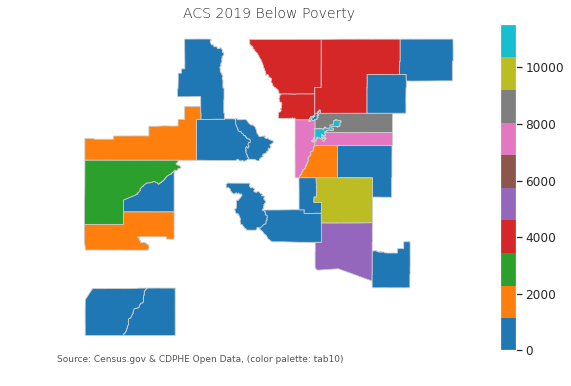

In [26]:
cf.gen_colo_choropleth(acs19_pov_df, 'ACS_2019_Poverty', 'total_below_pov', 'ACS 2019 Below Poverty', 'tab10')

vmin: 1106 vmax: 81478


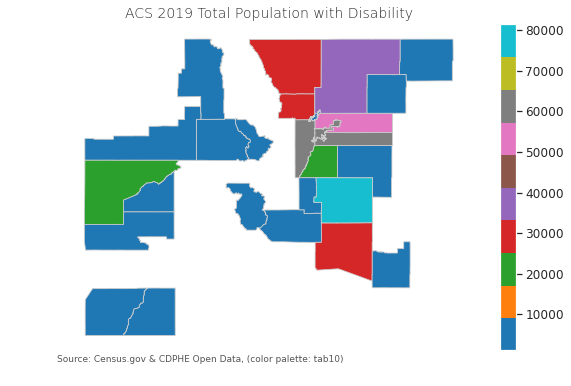

In [27]:
cf.gen_colo_choropleth(acs19_pov_df, 'ACS_2019_Poverty', 'total_types_w_dis', 'ACS 2019 Total Population with Disability',  'tab10')

In [28]:
acs19_pov_df.describe()

,total_pov_hsh_type,total_below_pov,pov_below_married_cpl,pov_below_other,pov_below_other_male,pov_below_other_female,total_above_pov_hsh_type,above_pov_married_cpl,above_pov_other,above_pov_other_male,...,total_types_w_dis,types_hearing,types_vision,types_cognitive,types_ambulatory,types_self_care,types_ind_living,types_no_dis,state_id,county_id
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.0,27.000000
mean,48502.148148,2768.777778,1135.222222,1633.555556,304.888889,1328.666667,45733.370370,36761.481481,8971.888889,3311.037037,...,20821.407407,6696.851852,3841.185185,7869.703704,9168.074074,3253.259259,6962.000000,178843.370370,8.0,59.481481
std,59204.825869,3393.806705,1346.230359,2093.911363,385.037294,1770.743629,56127.055745,44547.660667,11900.642414,4266.421402,...,24156.128603,7598.193331,4359.849962,9551.291736,10490.289092,3870.457602,8475.661626,213927.993199,0.0,36.731217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1106.000000,485.000000,141.000000,77.000000,2.000000,2.000000,80.000000,16190.000000,8.0,1.000000
25%,6111.000000,284.500000,90.000000,137.000000,0.000000,129.000000,5818.500000,4806.000000,721.000000,243.000000,...,3376.000000,1250.500000,627.500000,1283.500000,1570.000000,375.000000,1218.500000,24541.500000,8.0,33.000000
50%,13458.000000,1077.000000,437.000000,656.000000,92.000000,567.000000,12571.000000,10794.000000,1777.000000,849.000000,...,6035.000000,1842.000000,1443.000000,1946.000000,2755.000000,1691.000000,2063.000000,51466.000000,8.0,59.000000
75%,85551.500000,3894.000000,1775.500000,2281.000000,436.500000,1832.000000,81657.500000,67517.000000,12887.000000,5293.500000,...,31895.500000,10366.000000,6101.500000,12034.000000,14986.000000,4705.000000,9614.500000,309088.500000,8.0,86.000000
max,182032.000000,11528.000000,4996.000000,6785.000000,1137.000000,5793.000000,172017.000000,139738.000000,35281.000000,12919.000000,...,81478.000000,27704.000000,14031.000000,35246.000000,33401.000000,12206.000000,29342.000000,655623.000000,8.0,123.000000


vmin: 0 vmax: 11528


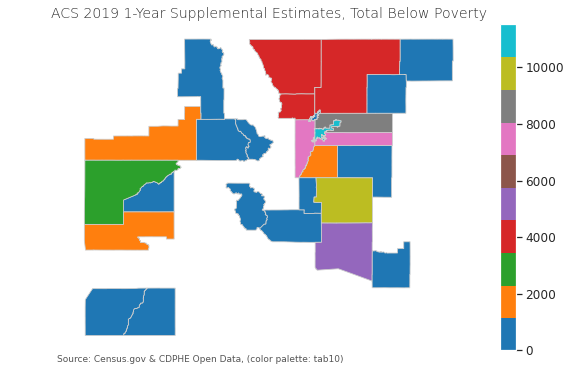

In [29]:
cf.gen_colo_choropleth(acs19_pov_df, 'ACS_2019_Poverty', 'total_below_pov', 'ACS 2019 1-Year Supplemental Estimates, Total Below Poverty', 'tab10')

## 2019 1-Year Supplemental Estimates

### Household Income Estimates
 

#### Restore Data Frame from Disk

In [30]:
acs19_inc_df = cf.load_pickled_df(path = 
    "/home/jdreed/MSDS696/data/processed/ACS19-acs19_inc_df.p")

In [31]:
acs19_inc_df.head()

,county,total_hsh_inc,hsh_inc_lt20,hsh_inc_20_40,hsh_inc_40_60,hsh_inc_60_100,hsh_inc_100_150,hsh_inc_150_200,hsh_inc_200_plus,med_household_inc,...,fam_inc_200_plus,med_fam_inc,med_nf_inc,med_earn_sex,med_earn_male,med_earn_male_full,med_earn_female,med_earn_female_full,state_id,county_id
0,Chaffee,9010,1278,1652,1845,1655,1383,856,341,58692,...,283,66632,31943,31294,37450,56018,20067,42451,08,015
1,Garfield,23257,2797,3602,3573,6197,4169,1547,1372,72134,...,1204,77558,46657,36628,39962,47759,31389,45848,08,045
2,Jefferson,236496,17263,28113,29391,54947,49911,24847,32024,90040,...,27719,111123,55672,47438,56622,70824,37904,53301,08,059
3,Adams,171977,14786,24079,28389,45485,31704,16219,11315,75804,...,9189,85129,50622,37396,42204,51723,31065,42582,08,001
4,Eagle,19093,1766,2884,2641,4043,2990,1186,3583,85134,...,2572,93516,47656,37498,40218,50222,32492,45040,08,037


In [32]:
acs19_inc_df.med_household_inc.astype(int)
tabulate(acs19_inc_df)

NameError: name 'tabulate' is not defined

vmin: 48009 vmax: 122867


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

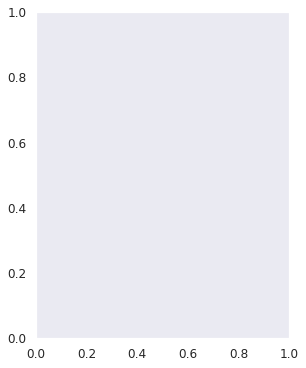

In [33]:
cf.gen_colo_choropleth(acs19_inc_df, 'ACS_2019_Poverty', 'med_household_inc', 
                       'ACS 2019 2019 1-Year Supplemental Estimates, Median Household Income', 'tab10')

In [ ]:
from datetime import date
print(f'Complete: {date.today()}')